In [1]:
import NO_utils_multiple
import NO_utils
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

## Load and visualize data

In [2]:
def load_and_process_dataset(data_path, print_dataset=True):
    start_time = time.time()
    (designs, design_params, n_designs, n_panes, design_res,
     WAVEVECTOR_DATA, WAVEFORM_DATA, n_dim, n_wavevectors,
     EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x,
     EIGENVECTOR_DATA_y, const, N_struct,
     imag_tol, rng_seed_offset) = NO_utils.extract_data(data_path)

    print(f"Loading dataset path: {data_path}")
    # Take first pane of designs
    designs = designs[:,0,:,:]

    # Convert WAVEVECTOR_DATA to spatial domain
    WAVEFORM_DATA = NO_utils_multiple.embed_2const_wavelet(WAVEVECTOR_DATA[0,:,0], WAVEVECTOR_DATA[0,:,1], size=design_res) #(600, 325, 2)

    # Convert all bands to spatial domain
    bands = np.arange(1, n_bands + 1)
    bands_fft = NO_utils_multiple.embed_integer_wavelet(bands, size=design_res)

    # Create the result dictionary
    dataset = {
        "designs": designs, "design_params": design_params, "n_designs": n_designs,
        "WAVEVECTOR_DATA": WAVEVECTOR_DATA, "WAVEFORM_DATA": WAVEFORM_DATA,
        "EIGENVALUE_DATA": EIGENVALUE_DATA, "EIGENVECTOR_DATA_x": EIGENVECTOR_DATA_x,
        "EIGENVECTOR_DATA_y": EIGENVECTOR_DATA_y, "bands_fft": bands_fft
    }
    
    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print dataset sizes and elapsed time
    if print_dataset:
        print(f"Dataset loaded from {data_path}:")
        for key, value in dataset.items():
            print(f"  {key}: {np.shape(value)}")
        print(f"Elapsed time: {elapsed_time:.2f} seconds")
    
    return dataset

def save_dataset(save_path, designs=None, design_params=None, waveforms=None, wavevectors=None, 
                eigenvalue_data=None, eigenvector_data_x=None, eigenvector_data_y=None, bands_fft=None):
    """
    Save dataset arrays to a specified path.
    
    Parameters:
    - save_path: Path to save the dataset
    - designs: Array of design patterns (optional)
    - design_params: Array of design parameters (optional)
    - waveforms: Array of waveform data (optional)
    - wavevectors: Array of wavevector data (optional)
    - eigenvalue_data: Array of eigenvalues (optional)
    - eigenvector_data_x: Array of x-component eigenvectors (optional)
    - eigenvector_data_y: Array of y-component eigenvectors (optional)
    - bands_fft: Array of band data in Fourier space (optional)
    """
    os.makedirs(save_path, exist_ok=True)
    
    print(f"Dataset saved to {save_path}")
    
    # Save each array with np.save if provided
    if designs is not None:
        np.save(os.path.join(save_path, 'designs.npy'), designs)
        saved_arrays = ['designs']
    if design_params is not None:
        np.save(os.path.join(save_path, 'design_params.npy'), design_params)
        saved_arrays.append('design_params')
    if waveforms is not None:
        np.save(os.path.join(save_path, 'waveforms.npy'), waveforms)
        saved_arrays.append('waveforms')
    if wavevectors is not None:
        np.save(os.path.join(save_path, 'wavevectors.npy'), wavevectors)
        saved_arrays.append('wavevectors')
    if eigenvalue_data is not None:
        np.save(os.path.join(save_path, 'eigenvalue_data.npy'), eigenvalue_data)
        saved_arrays.append('eigenvalue_data')
    if eigenvector_data_x is not None:
        np.save(os.path.join(save_path, 'eigenvector_data_x.npy'), eigenvector_data_x)
        saved_arrays.append('eigenvector_data_x')
    if eigenvector_data_y is not None:
        np.save(os.path.join(save_path, 'eigenvector_data_y.npy'), eigenvector_data_y)
        saved_arrays.append('eigenvector_data_y')
    if bands_fft is not None:
        np.save(os.path.join(save_path, 'bands_fft.npy'), bands_fft)
        saved_arrays.append('bands_fft')
    
    print(f"Saved arrays: {', '.join(saved_arrays)}")

def load_dataset(load_path, drop_redundant=True):
    """
    Load dataset arrays from a specified path.
    
    Parameters:
    - load_path: Path to load the dataset from
    
    Returns:
    - designs: Array of design patterns
    - design_params: Array of design parameters
    - waveforms: Array of waveform data
    - wavevectors: Array of wavevector data
    - eigenvalue_data: Array of eigenvalues
    - eigenvector_data_x: Array of x-component eigenvectors
    - eigenvector_data_y: Array of y-component eigenvectors
    - bands_fft: Array of band data in Fourier space
    """
    if not os.path.exists(load_path):
        raise FileNotFoundError(f"Dataset directory {load_path} does not exist")
    
    # Load each array with np.load
    if drop_redundant:
        designs = np.load(os.path.join(load_path, 'designs.npy'))
        waveforms = np.load(os.path.join(load_path, 'waveforms.npy'))
        wavevectors = np.load(os.path.join(load_path, 'wavevectors.npy'))
    else:
        designs = np.load(os.path.join(load_path, 'designs.npy'))
        waveforms = np.load(os.path.join(load_path, 'waveforms.npy'))
        wavevectors = np.load(os.path.join(load_path, 'wavevectors.npy'))
    design_params = np.load(os.path.join(load_path, 'design_params.npy'))
    eigenvalue_data = np.load(os.path.join(load_path, 'eigenvalue_data.npy'))
    eigenvector_data_x = np.load(os.path.join(load_path, 'eigenvector_data_x.npy'))
    eigenvector_data_y = np.load(os.path.join(load_path, 'eigenvector_data_y.npy'))
    bands_fft = np.load(os.path.join(load_path, 'bands_fft.npy'))
    
    print(f"Dataset loaded from {load_path}")
    
    return designs, design_params, waveforms, wavevectors, eigenvalue_data, eigenvector_data_x, eigenvector_data_y, bands_fft

In [3]:
# Load and extract data
# Define paths for both datasets
datafolder1_name = ["data", "set 1"]
datafolder2_name = ["data", "set 2"]
datafolder3_name = ["data", "set 3"]

data_path1 = os.path.join(*datafolder1_name)
data_path2 = os.path.join(*datafolder2_name)
data_path3 = os.path.join(*datafolder3_name)

# # Load and process datasets
# dataset1 = load_and_process_dataset(data_path1)
# designs = dataset1["designs"]
# design_params = dataset1["design_params"]
# eigenvalue_data = dataset1["EIGENVALUE_DATA"]
# eigenvector_data_x = dataset1["EIGENVECTOR_DATA_x"]
# eigenvector_data_y = dataset1["EIGENVECTOR_DATA_y"]
# #Take unique subset of waveforms    
# waveforms = dataset1["WAVEFORM_DATA"]
# wavevectors = dataset1["WAVEVECTOR_DATA"]
# bands_fft = dataset1["bands_fft"]
# print("Dataset 1 loaded and saved.")
# print(f"Wavevectors shape: {wavevectors.shape}")
# print(f"Waveforms shape: {waveforms.shape}")
# save_dataset(data_path1, dataset1["designs"], 
#              dataset1["design_params"], 
#              dataset1["WAVEFORM_DATA"], 
#              dataset1["WAVEVECTOR_DATA"],
#              dataset1["EIGENVALUE_DATA"], 
#              dataset1["EIGENVECTOR_DATA_x"], 
#              dataset1["EIGENVECTOR_DATA_y"], 
#              dataset1["bands_fft"])
# # Free up memory by deleting dataset1
# del dataset1

# dataset2 = load_and_process_dataset(data_path2)
# designs = np.concatenate([designs, dataset2["designs"]], axis=0)
# design_params = np.concatenate([design_params, dataset2["design_params"]], axis=0)
# eigenvalue_data = np.concatenate([eigenvalue_data, dataset2["EIGENVALUE_DATA"]], axis=0)
# eigenvector_data_x = np.concatenate([eigenvector_data_x, dataset2["EIGENVECTOR_DATA_x"]], axis=0)
# eigenvector_data_y = np.concatenate([eigenvector_data_y, dataset2["EIGENVECTOR_DATA_y"]], axis=0)
# # waveforms should be the same for each dataset
# # bands_ftt should be the same for each dataset
# save_dataset(data_path2, dataset2["designs"],
#              dataset2["design_params"],
#              dataset2["WAVEFORM_DATA"],
#              dataset2["WAVEVECTOR_DATA"],
#              dataset2["EIGENVALUE_DATA"],
#              dataset2["EIGENVECTOR_DATA_x"],
#              dataset2["EIGENVECTOR_DATA_y"],
#              dataset2["bands_fft"])
# # Free up memory by deleting dataset2
# del dataset2

# dataset3 = load_and_process_dataset(data_path3)
# designs = np.concatenate([designs, dataset3["designs"]], axis=0)
# design_params = np.concatenate([design_params, dataset3["design_params"]], axis=0)
# eigenvalue_data = np.concatenate([eigenvalue_data, dataset3["EIGENVALUE_DATA"]], axis=0)
# eigenvector_data_x = np.concatenate([eigenvector_data_x, dataset3["EIGENVECTOR_DATA_x"]], axis=0)
# eigenvector_data_y = np.concatenate([eigenvector_data_y, dataset3["EIGENVECTOR_DATA_y"]], axis=0)
# # waveforms should be the same for each dataset
# # bands_ftt should be the same for each dataset
# save_dataset(data_path3, dataset3["designs"],
#              dataset3["design_params"],
#              dataset3["WAVEFORM_DATA"],
#              dataset3["WAVEVECTOR_DATA"],
#              dataset3["EIGENVALUE_DATA"],
#              dataset3["EIGENVECTOR_DATA_x"],
#              dataset3["EIGENVECTOR_DATA_y"],
#              dataset3["bands_fft"])
# # Free up memory by deleting dataset3
# del dataset3

### Load data converted to np arrays ###
designs, design_params, waveforms, wavevectors, eigenvalue_data, eigenvector_data_x, eigenvector_data_y, bands_fft = load_dataset(data_path1)

Dataset loaded from data\set 1


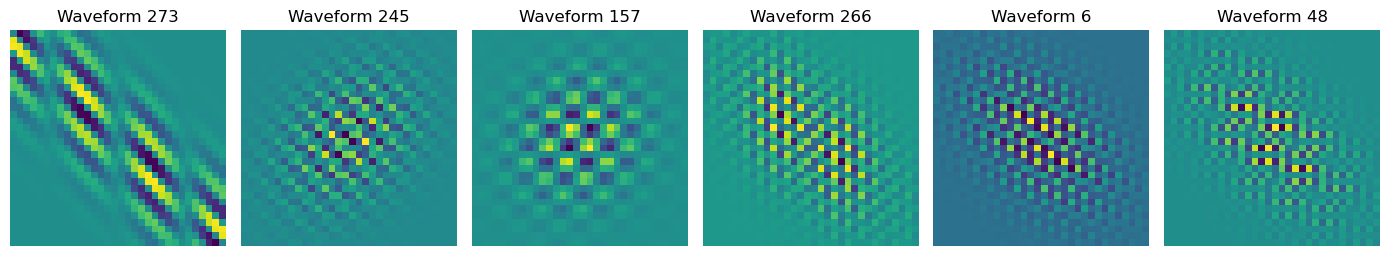

In [4]:
# Plot 5 random sample waveform images
random_indices = np.random.choice(waveforms.shape[0], size=6, replace=False)

plt.figure(figsize=(14,4))  # Made figure wider to accommodate colorbar

for i, idx in enumerate(random_indices):
    plt.subplot(1,6,i+1)
    im = plt.imshow(waveforms[idx], cmap='viridis')
    plt.title(f'Waveform {idx}')
    plt.axis('off')

# Add colorbar to the right of all subplots
#plt.colorbar(im, ax=plt.gcf().axes, location='right')

plt.tight_layout()
plt.show()

In [5]:
#Print shapes of arrays
print(f'shape of designs: {np.shape(designs)}')
print(f'shape of waveforms: {np.shape(waveforms)}')
print(f'shape of wavevectors: {np.shape(wavevectors)}')
print(f'shape of EIGENVALUE_DATA: {np.shape(eigenvalue_data)}')
print(f'shape of EIGENVECTOR_DATA_x: {np.shape(eigenvector_data_x)}')
print(f'shape of EIGENVECTOR_DATA_y: {np.shape(eigenvector_data_y)}')
print(f'shape of band_fft: {np.shape(bands_fft)}')

n_designs = np.shape(designs)[0]
n_bands = np.shape(bands_fft)[0]
n_waveforms = np.shape(waveforms)[0]
print(f'number of designs: {n_designs}')
print(f'number of bands: {n_bands}')
print(f'number of waveforms: {n_waveforms}')

# Print the max and min values of all the arrays with a size of 400 in its first dimension.
print(f'Max value of designs: {np.max(designs)}')
print(f'Min value of designs: {np.min(designs)}')
print(f'Max value of WAVEFORM_DATA: {np.max(waveforms)}')
print(f'Min value of WAVEFORM_DATA: {np.min(waveforms)}')
print(f'Max value of WAVEVECTOR_DATA_x: {np.max(eigenvector_data_x)}')
print(f'Min value of WAVEVECTOR_DATA_x: {np.min(eigenvector_data_x)}')
print(f'Max value of WAVEVECTOR_DATA_y: {np.max(eigenvector_data_y)}')
print(f'Min value of WAVEVECTOR_DATA_y: {np.min(eigenvector_data_y)}')

shape of designs: (600, 32, 32)
shape of waveforms: (325, 32, 32)
shape of wavevectors: (600, 325, 2)
shape of EIGENVALUE_DATA: (600, 325, 6)
shape of EIGENVECTOR_DATA_x: (600, 325, 6, 32, 32)
shape of EIGENVECTOR_DATA_y: (600, 325, 6, 32, 32)
shape of band_fft: (6, 32, 32)
number of designs: 600
number of bands: 6
number of waveforms: 325
Max value of designs: 1.0
Min value of designs: 0.0
Max value of WAVEFORM_DATA: 0.9889414087847644
Min value of WAVEFORM_DATA: -0.9842728288376629
Max value of WAVEVECTOR_DATA_x: (0.59423828125+0j)
Min value of WAVEVECTOR_DATA_x: (-0.685546875+0j)
Max value of WAVEVECTOR_DATA_y: (0.63818359375+0.1103515625j)
Min value of WAVEVECTOR_DATA_y: (-0.59228515625-0.0186614990234375j)


In [6]:
# Flatten the arrays and plot a separate histogram showing the distribution of values for each array with a size of 400 in its first dimension. Drop any imaginary components for the eigenvectors.
designs_flat = designs.flatten()
WAVEFORM_DATA_flat = waveforms.flatten()
EIGENVECTOR_DATA_x_flat = eigenvector_data_x.flatten()
EIGENVECTOR_DATA_y_flat = eigenvector_data_y.flatten()

# Print the shape of the flattened arrays
print(f'shape of designs_flat: {designs_flat.shape}')
print(f'shape of WAVEFORM_DATA_flat: {WAVEFORM_DATA_flat.shape}')
print(f'shape of EIGENVECTOR_DATA_x_flat: {EIGENVECTOR_DATA_x_flat.shape}')
print(f'shape of EIGENVECTOR_DATA_y_flat: {EIGENVECTOR_DATA_y_flat.shape}')

# Delete the flattened arrays
del designs_flat, WAVEFORM_DATA_flat, EIGENVECTOR_DATA_x_flat, EIGENVECTOR_DATA_y_flat  

# Take the symlog of the flattened arrays. Take the real value for complex valued arrays.
# designs_flat_symlog = np.sign(designs_flat) * np.log10(np.abs(designs_flat) + 1)
# WAVEFORM_DATA_flat_symlog = np.sign(WAVEFORM_DATA_flat) * np.log10(np.abs(WAVEFORM_DATA_flat) + 1)
# EIGENVECTOR_DATA_x_flat_symlog = np.sign(EIGENVECTOR_DATA_x_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_x_flat.real) + 1)
# EIGENVECTOR_DATA_y_flat_symlog = np.sign(EIGENVECTOR_DATA_y_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_y_flat.real) + 1)


shape of designs_flat: (614400,)
shape of WAVEFORM_DATA_flat: (332800,)
shape of EIGENVECTOR_DATA_x_flat: (1198080000,)
shape of EIGENVECTOR_DATA_y_flat: (1198080000,)


Checking for NANs and INFs in data:
Designs - NANs: False, INFs: False
Waveforms - NANs: False, INFs: False
Eigenvalues - NANs: False, INFs: False
Eigenvectors X - NANs: False, INFs: False
Eigenvectors Y - NANs: False, INFs: False
Bands FFT - NANs: False, INFs: False


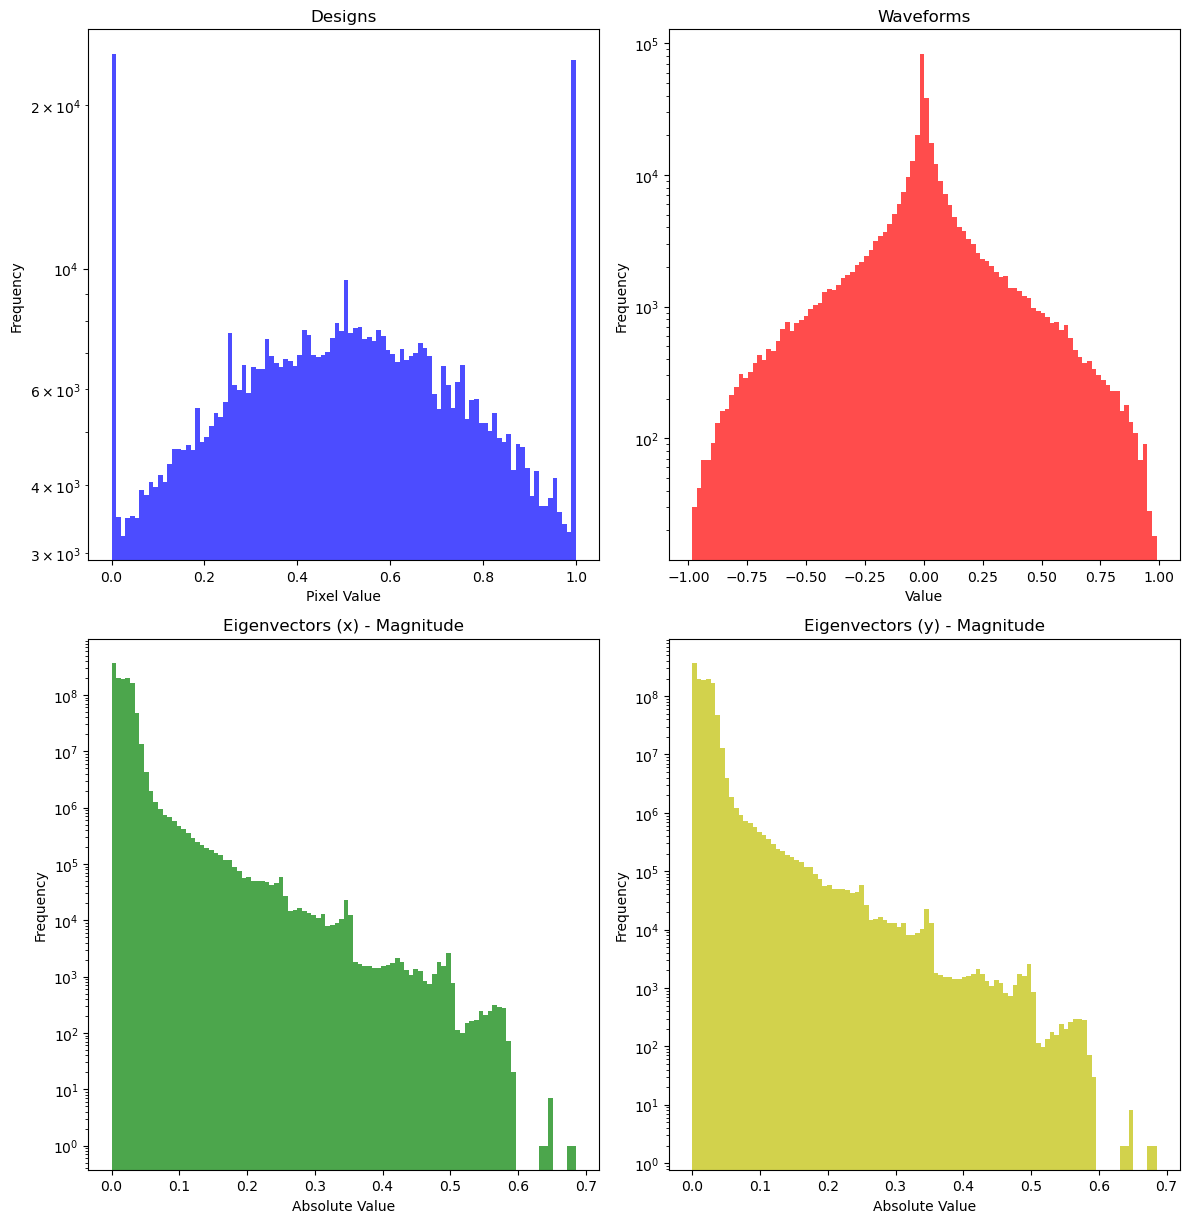

In [7]:
# Check for NANs or INFs in data
# Check for NANs and INFs in each array
print("Checking for NANs and INFs in data:")
print(f"Designs - NANs: {np.isnan(designs).any()}, INFs: {np.isinf(designs).any()}")
print(f"Waveforms - NANs: {np.isnan(waveforms).any()}, INFs: {np.isinf(waveforms).any()}")
print(f"Eigenvalues - NANs: {np.isnan(eigenvalue_data).any()}, INFs: {np.isinf(eigenvalue_data).any()}")
print(f"Eigenvectors X - NANs: {np.isnan(eigenvector_data_x).any()}, INFs: {np.isinf(eigenvector_data_x).any()}")
print(f"Eigenvectors Y - NANs: {np.isnan(eigenvector_data_y).any()}, INFs: {np.isinf(eigenvector_data_y).any()}")
print(f"Bands FFT - NANs: {np.isnan(bands_fft).any()}, INFs: {np.isinf(bands_fft).any()}")
# Plot the histograms of flattened real values for each array
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

axes[0, 0].hist(designs.flatten(), bins=100, color='b', alpha=0.7)
axes[0, 0].set_title('Designs')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_yscale('log')

axes[0, 1].hist(waveforms.flatten(), bins=100, color='r', alpha=0.7)
axes[0, 1].set_title('Waveforms')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_yscale('log')

axes[1, 0].hist(np.abs(eigenvector_data_x.flatten()), bins=100, color='g', alpha=0.7)
axes[1, 0].set_title('Eigenvectors (x) - Magnitude')
axes[1, 0].set_xlabel('Absolute Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_yscale('log')

axes[1, 1].hist(np.abs(eigenvector_data_y.flatten()), bins=100, color='y', alpha=0.7)
axes[1, 1].set_title('Eigenvectors (y) - Magnitude') 
axes[1, 1].set_xlabel('Absolute Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_yscale('log')

# Remove the bottom row of plots since we only need 2 histograms now
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()

In [8]:
# Draw a random design and its corresponding eigenvectors
#n_bands = 6
random_seed = 36
random.seed(random_seed)
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index]
sample_band = np.random.randint(0, n_bands)
sample_waveform_index = np.random.randint(0, n_waveforms)
sample_waveform = waveforms[sample_waveform_index]
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')

# Print shapes of the samples
print(f'Sample geometry shape: {sample_geometry.shape}')
print(f'Sample waveform shape: {sample_waveform.shape}')
print(f'Sample index: {sample_index}')
print(f'Sample band: {sample_band}')
print(f'Sample waveform index: {sample_waveform_index}')

Design: 151, Band: 2, Wavevector: 219
Sample geometry shape: (32, 32)
Sample waveform shape: (32, 32)
Sample index: 151
Sample band: 2
Sample waveform index: 219


designs shape: (600, 32, 32)
WAVEFORM_DATA shape: (325, 32, 32)
Average pixel values of all geometries: 0.49760564842687216
Average pixel values of all waveforms: 0.0008113469856050465


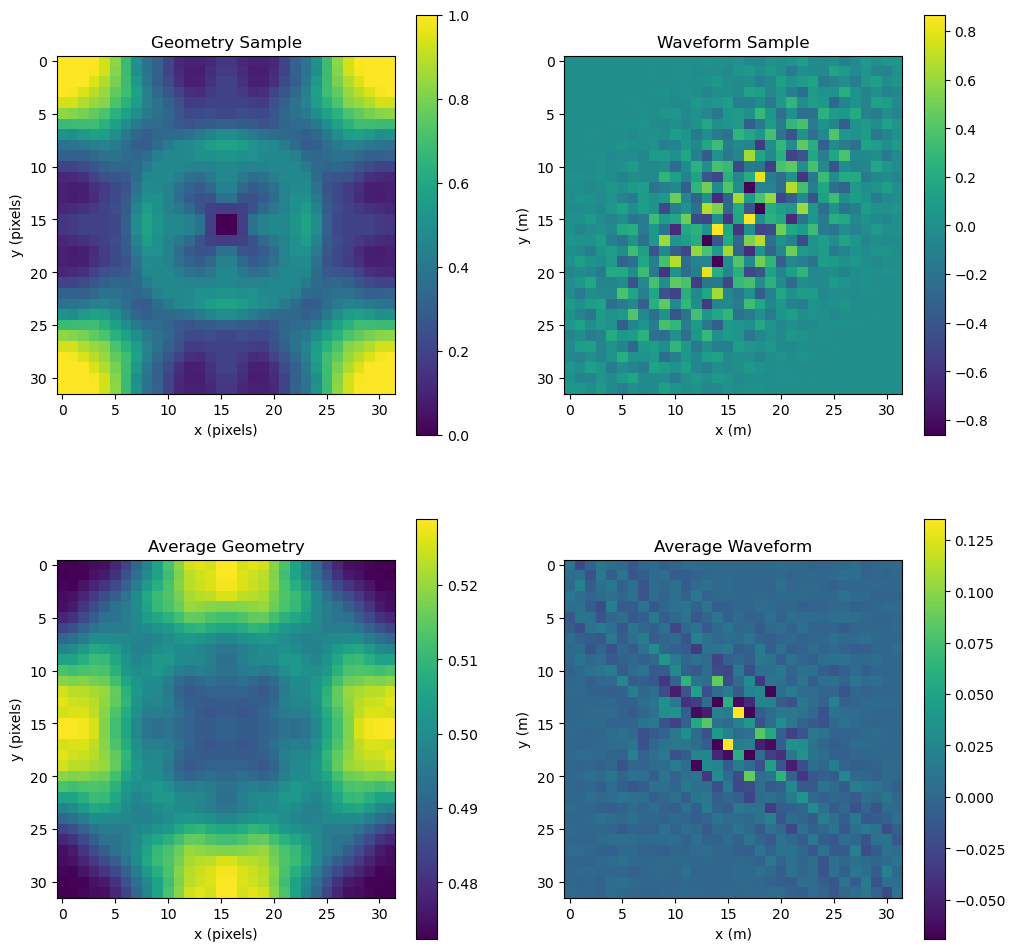

In [9]:
# Calculate the average values for geometry and waveform across all samples
print(f'designs shape: {designs.shape}')
print(f'WAVEFORM_DATA shape: {waveforms.shape}')

avg_geometry = np.mean(designs[:], axis=0)
avg_waveform = np.mean(waveforms[:], axis=0)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the geometry sample on the top-left
im1 = axes[0, 0].imshow(sample_geometry, cmap='viridis')
axes[0, 0].set_title('Geometry Sample')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[0, 0])

# Plot the waveform sample on the top-right
im2 = axes[0, 1].imshow(sample_waveform, cmap='viridis')
axes[0, 1].set_title('Waveform Sample')
axes[0, 1].set_xlabel('x (m)')
axes[0, 1].set_ylabel('y (m)')
plt.colorbar(im2, ax=axes[0, 1])

# Plot the average geometry on the bottom-left
im3 = axes[1, 0].imshow(avg_geometry, cmap='viridis')
axes[1, 0].set_title('Average Geometry')
axes[1, 0].set_xlabel('x (pixels)')
axes[1, 0].set_ylabel('y (pixels)')
plt.colorbar(im3, ax=axes[1, 0])

# Plot the average waveform on the bottom-right
im4 = axes[1, 1].imshow(avg_waveform, cmap='viridis')
axes[1, 1].set_title('Average Waveform')
axes[1, 1].set_xlabel('x (m)')
axes[1, 1].set_ylabel('y (m)')
plt.colorbar(im4, ax=axes[1, 1])

print(f'Average pixel values of all geometries: {np.mean(designs[:,0])}')
print(f'Average pixel values of all waveforms: {np.mean(waveforms[0,:])}')

Design: 151, Band: 2, Wavevector: 219


c:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\NO_utils.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


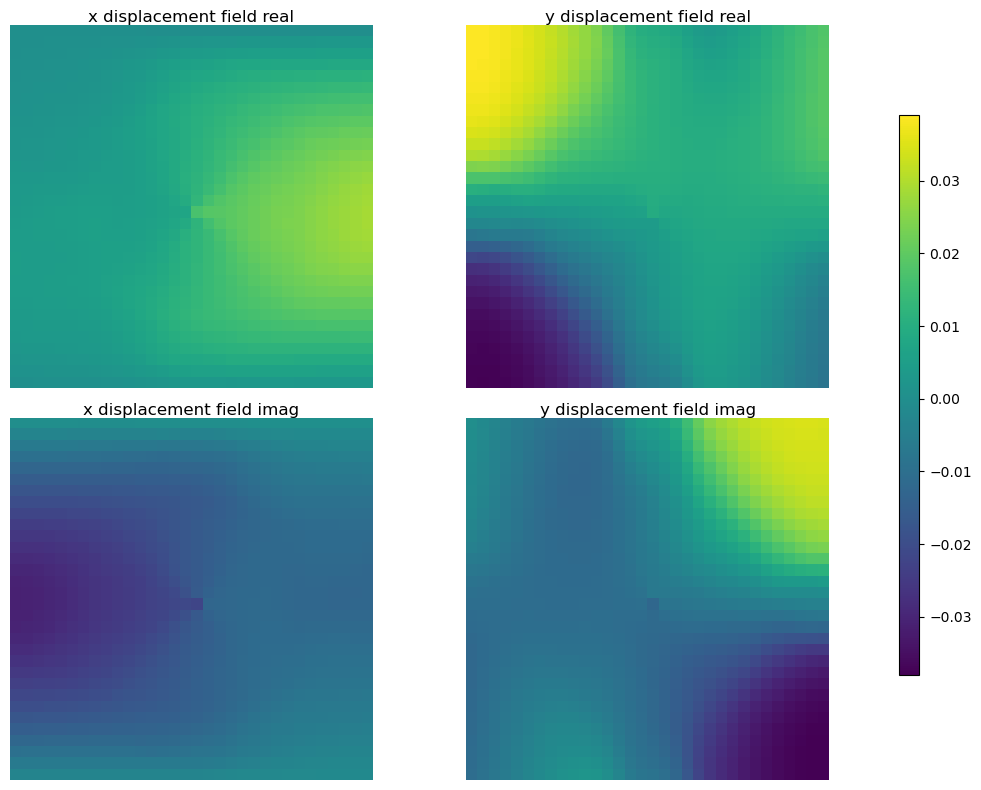

In [10]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_waveform_index}')
sample_eigenvector_x = eigenvector_data_x[sample_index, sample_waveform_index, sample_band]
sample_eigenvector_y = eigenvector_data_y[sample_index, sample_waveform_index, sample_band]

NO_utils.plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)

## Model architecture & training

In [11]:
# Import modules for building a neural operator model
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# Import specialized neural operator model tools
from neuralop.models import FNO, FNO2d, TFNO, TFNO2d
from neuralop import Trainer
from neuralop import LpLoss, H1Loss

# For creating datasets and data loaders for training and evaluation
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split, ConcatDataset
from sklearn.preprocessing import StandardScaler

# Optional: torchvision for augmentations and transformations (if working with image-like data)
import torchvision.transforms as transforms

# For plotting and visualization
import matplotlib.pyplot as plt

# Optional: Use tqdm for progress bars during training and evaluation
from tqdm import tqdm

# Optional: If you are working with graph data or architectures
# import torch_geometric

# If you need automatic differentiation for custom operations or gradients
from torch.autograd import Function

In [12]:
#Set the device for the neural operator model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print("Using PyTorch version:", torch.__version__)

# Print the shape of the first input tensor for confirmation
print("Shape of the first input tensor to be assigned:")
print("designs[0, 0]:", designs[0, 0].shape)
print("WAVEFORM_DATA[0, 0]:", waveforms[0, 0].shape)

# Print the shape of the first output tensor for confirmation
print("Shape of the first output tensor to be assigned:")
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_x[0, 0, 0].shape)
print("EIGENVECTOR_DATA_x[0, 0, 0]:", eigenvector_data_y[0, 0, 0].shape)

Using Device: cuda
Using PyTorch version: 2.5.1
Shape of the first input tensor to be assigned:
designs[0, 0]: (32,)
WAVEFORM_DATA[0, 0]: (32,)
Shape of the first output tensor to be assigned:
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)


In [13]:
# Print the data shape and types of the first input and output tensors
print("Data shape and type of the first input tensor:")
print("designs:", designs.shape, designs[0, 0].dtype)
print("WAVEFORM_DATA:", waveforms.shape, waveforms[0, 0].dtype)
print("BAND_FFT:", bands_fft.shape, bands_fft[0, 0].dtype)

print("Data shape and type of the first output tensor:")
print("EIGENVECTOR_DATA_x:", eigenvector_data_x.shape, eigenvector_data_x[0, 0, 0].dtype)
print("EIGENVECTOR_DATA_y:", eigenvector_data_y.shape, eigenvector_data_y[0, 0, 0].dtype)

eigenvalue_mean = np.mean(eigenvalue_data)
eigenvalue_scale = np.std(eigenvalue_data)

eigvector_x_r_mean = np.mean(eigenvector_data_x.real)
eigvector_x_r_scale = np.std(eigenvector_data_x.real)
eigvector_x_i_mean = np.mean(eigenvector_data_x.imag)
eigvector_x_i_scale = np.std(eigenvector_data_x.imag)

eigvector_y_r_mean = np.mean(eigenvector_data_y.real)   
eigvector_y_r_scale = np.std(eigenvector_data_y.real)
eigvector_y_i_mean = np.mean(eigenvector_data_y.imag)
eigvector_y_i_scale = np.std(eigenvector_data_y.imag)

wavevector_mean = np.mean(waveforms)
wavevector_scale = np.std(waveforms)

# Print the mean and scale values for each standardized array
print("Eigenvalue mean, scale:", eigenvalue_mean, eigenvalue_scale)
print("Eigenvector x real mean, scale:", eigvector_x_r_mean, eigvector_x_r_scale)
print("Eigenvector x imag mean, scale:", eigvector_x_i_mean, eigvector_x_i_scale)
print("Eigenvector y real mean, scale:", eigvector_y_r_mean, eigvector_y_r_scale)
print("Eigenvector y imag mean, scale:", eigvector_y_i_mean, eigvector_y_i_scale)
print("Wavevector mean, scale:", wavevector_mean, wavevector_scale)
print('\n')

# Print the full range and data types of values for each standardized array
print("Eigenvalue range:", np.min(eigenvalue_data), np.max(eigenvalue_data), "dtype:", eigenvalue_data.dtype)
print("Eigenvector x real range:", np.min(eigenvector_data_x.real), np.max(eigenvector_data_x.real), "dtype:", eigenvector_data_x.real.dtype)
print("Eigenvector x imag range:", np.min(eigenvector_data_x.imag), np.max(eigenvector_data_x.imag), "dtype:", eigenvector_data_x.imag.dtype)
print("Eigenvector y real range:", np.min(eigenvector_data_y.real), np.max(eigenvector_data_y.real), "dtype:", eigenvector_data_y.real.dtype)
print("Eigenvector y imag range:", np.min(eigenvector_data_y.imag), np.max(eigenvector_data_y.imag), "dtype:", eigenvector_data_y.imag.dtype)
print("Wavevector range:", np.min(waveforms), np.max(waveforms), "dtype:", waveforms.dtype)

Data shape and type of the first input tensor:
designs: (600, 32, 32) float64
WAVEFORM_DATA: (325, 32, 32) float64
BAND_FFT: (6, 32, 32) float64
Data shape and type of the first output tensor:
EIGENVECTOR_DATA_x: (600, 325, 6, 32, 32) complex64
EIGENVECTOR_DATA_y: (600, 325, 6, 32, 32) complex64


c:\Users\hz283\AppData\Local\anaconda3\envs\NO_2D_Metamaterials\Lib\site-packages\numpy\core\_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


Eigenvalue mean, scale: 1878.0 inf
Eigenvector x real mean, scale: 0.0018456825 0.016225157
Eigenvector x imag mean, scale: -0.0008928475 0.014881316
Eigenvector y real mean, scale: -0.000686133 0.015982825
Eigenvector y imag mean, scale: -0.0008507387 0.015198924
Wavevector mean, scale: 0.00038031600748028485 0.2100449812450114


Eigenvalue range: 0.0 4116.0 dtype: float16
Eigenvector x real range: -0.6855469 0.5942383 dtype: float32
Eigenvector x imag range: -0.58203125 0.5805664 dtype: float32
Eigenvector y real range: -0.59228516 0.6381836 dtype: float32
Eigenvector y imag range: -0.60498047 0.60498047 dtype: float32
Wavevector range: -0.9842728288376629 0.9889414087847644 dtype: float64


In [14]:
# Prepare input and output data
design_res = 32
num_samples = n_designs * n_waveforms * n_bands
input_data = torch.zeros((num_samples, 3, design_res, design_res), dtype=torch.complex64)
output_data = torch.zeros((num_samples, 2, design_res, design_res), dtype=torch.complex64)

sample_idx = 0
for i in range(n_designs):
    for j in range(n_waveforms):
        for k in range(n_bands):
            # Convert real inputs to complex by adding zero imaginary part
            input_data[sample_idx, 0] = torch.complex(
                torch.from_numpy(designs[i]),
                torch.zeros_like(torch.from_numpy(designs[i]))
            )
            input_data[sample_idx, 1] = torch.complex(
                torch.from_numpy(waveforms[j]),
                torch.zeros_like(torch.from_numpy(waveforms[j]))
            )
            input_data[sample_idx, 2] = torch.complex(
                torch.from_numpy(bands_fft[k]),
                torch.zeros_like(torch.from_numpy(bands_fft[k]))
            )

            # Output data (already complex)
            output_data[sample_idx, 0] = torch.from_numpy(eigenvector_data_x[i, j, k])
            output_data[sample_idx, 1] = torch.from_numpy(eigenvector_data_y[i, j, k])

            sample_idx += 1

# Create dataset
dataset = TensorDataset(input_data, output_data)

# Split dataset into train, test, and validation sets
train_size = int(0.80 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Print the shapes and datatypes of the train, val, and test datasets
print(f"Train dataset shape: {train_dataset[0][0].shape}, datatype: {train_dataset[0][0].dtype}")
print(f"Validation dataset shape: {val_dataset[0][0].shape}, datatype: {val_dataset[0][0].dtype}")
print(f"Test dataset shape: {test_dataset[0][0].shape}, datatype: {test_dataset[0][0].dtype}")


Train dataset size: 936000
Validation dataset size: 175500
Test dataset size: 58500
Train dataset shape: torch.Size([3, 32, 32]), datatype: torch.complex64
Validation dataset shape: torch.Size([3, 32, 32]), datatype: torch.complex64
Test dataset shape: torch.Size([3, 32, 32]), datatype: torch.complex64


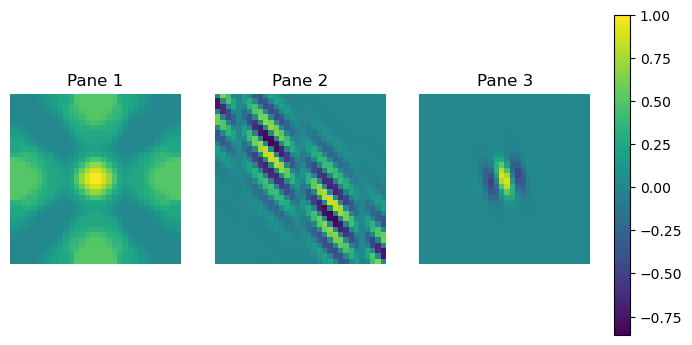

In [15]:
# Visualize a random sample input from the dataset
random_idx = np.random.randint(0, len(dataset))
random_input, random_output = dataset[random_idx]
input_shape = random_input.shape

# Check if imaginary components are zero
for i in range(3):
    if not torch.allclose(random_input[i].imag, torch.zeros_like(random_input[i].imag)):
        raise ValueError(f"Input {i} has non-zero imaginary component")

fig, axes = plt.subplots(1, input_shape[0], figsize=(8, 8))
axes = axes.flatten()

# Create a list to store all images for finding shared colorbar range
images = []
for i in range(3):
    img = random_input[i].real.numpy()
    images.append(img)

# Find global min/max for consistent colorbar
vmin = min(img.min() for img in images)
vmax = max(img.max() for img in images)

# Plot images with shared colorbar
for i in range(3):
    im = axes[i].imshow(images[i], cmap='viridis', vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Pane {i+1}')
    axes[i].axis('off')

# Add colorbar with height matching images
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.3, 0.02, 0.4])  # Reduced height from 0.6 to 0.4 and adjusted vertical position
fig.colorbar(im, cax=cbar_ax)

plt.show()

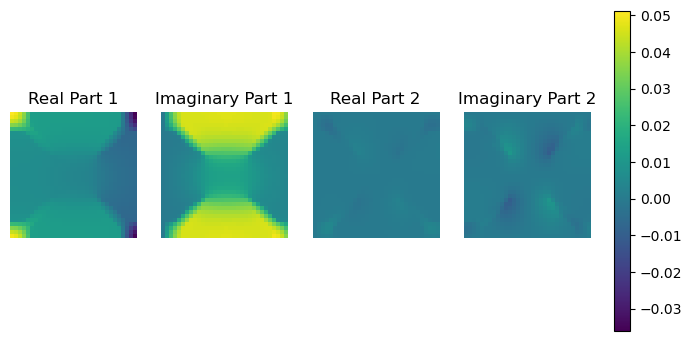

In [16]:
# Visualize a random sample output from the dataset
output_shape = random_output.shape

fig, axes = plt.subplots(1, 4, figsize=(8, 8))
axes = axes.flatten()

# Create a list to store all images for finding shared colorbar range
images = []
# First complex tensor - split into real and imaginary parts
images.append(random_output[0].real.numpy())  # Real part of first complex tensor
images.append(random_output[0].imag.numpy())  # Imaginary part of first complex tensor
# Second complex tensor - split into real and imaginary parts  
images.append(random_output[1].real.numpy())  # Real part of second complex tensor
images.append(random_output[1].imag.numpy())  # Imaginary part of second complex tensor

# Find global min/max for consistent colorbar
vmin = min(img.min() for img in images)
vmax = max(img.max() for img in images)

# Plot images with shared colorbar
titles = ['Real Part 1', 'Imaginary Part 1', 'Real Part 2', 'Imaginary Part 2']
for i in range(4):
    im = axes[i].imshow(images[i], cmap='viridis', vmin=vmin, vmax=vmax)
    axes[i].set_title(titles[i])
    axes[i].axis('off')

# Add colorbar with height matching images
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.3, 0.02, 0.4])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [17]:
# Print the shapes of the input and output data, train, test, and validation sets
print('Input data shape:', input_data.shape)
print('Output data shape:', output_data.shape)
print('Train data size:', len(train_dataset))
print('Test data size:', len(test_dataset))
print('Validation data size:', len(val_dataset))

# Inspect the first batch of data
for sample in train_loader:
    print('Batch shape:', sample[0].shape, sample[1].shape)
    #print(sample)
    break

Input data shape: torch.Size([1170000, 3, 32, 32])
Output data shape: torch.Size([1170000, 2, 32, 32])
Train data size: 936000
Test data size: 58500
Validation data size: 175500
Batch shape: torch.Size([256, 3, 32, 32]) torch.Size([256, 2, 32, 32])


In [19]:
def train_one_epoch(model, loader, criterion, optimizer, device, epoch, report_freq=100, save_after_batch=False, save_path=None):
    model.train()
    running_loss = 0.0
    total_batches = len(loader)
    progress_bar = tqdm(enumerate(loader), total=total_batches, desc=f"Epoch {epoch + 1}")

    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        # print(f"Model output shape: {outputs.shape}")
        # print(f"Target shape: {targets.shape}")
        # print(f"Number of channels in output: {outputs.shape[1]}")
        # print(f"Data type: {outputs.dtype}")
        # print(f"Range of values: [{outputs.min().item()}, {outputs.max().item()}]")
        loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Print progress for each batch
        if (batch_idx + 1) % report_freq == 0 or (batch_idx + 1) == total_batches:
            progress_bar.set_postfix(batch_loss=loss.item())

        # Save model weights after each batch if the flag is set
        if save_after_batch and save_path:
            save_model(model, save_path)

    epoch_loss = running_loss / len(loader.dataset)

    # Save model weights after each epoch if the flag is not set
    if not save_after_batch and save_path:
        save_model(model, save_path)

    return epoch_loss

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Function to save the model weights
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)

# Function to load the model weights
def load_model(model, file_path):
    model.load_state_dict(torch.load(file_path))

In [49]:
def plot_sample(data, title, labels, shared_colorbar=True, vmin=None, vmax=None, 
                layout=(1, 3), save=False, save_path='example_plot.png', plot_FT=True):
    # Create figure with space for both original and FT
    if plot_FT:
        fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows when plotting FT
    else:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes = axes.reshape(1, -1)  # Make 2D array for consistent indexing
    
    # Find global min/max if using shared colorbar
    if shared_colorbar and (vmin is None or vmax is None):
        vmin = data.real.min().cpu()
        vmax = data.real.max().cpu()
    
    # Plot components
    for i, (idx, label_base) in enumerate(labels):
        # Plot original data
        im = axes[0, i].imshow(data[idx].real.cpu(), 
                              cmap='viridis',
                              vmin=vmin if shared_colorbar else None,
                              vmax=vmax if shared_colorbar else None)
        axes[0, i].set_title(f"{label_base}")
        plt.colorbar(im, ax=axes[0, i])
        
        # Plot Fourier Transform if requested
        if plot_FT:
            # Compute 2D FFT and shift zero frequency to center
            ft = torch.fft.fftshift(torch.fft.fft2(data[idx])).cpu()
            # Plot magnitude in log scale
            magnitude = torch.log(torch.abs(ft) + 1)  # Add 1 to avoid log(0)
            im_ft = axes[1, i].imshow(magnitude, 
                                    cmap='viridis')
            axes[1, i].set_title(f"{label_base} (FT)")
            plt.colorbar(im_ft, ax=axes[1, i])
    
    plt.suptitle(title)
    plt.tight_layout()
    
    if save:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def plot_inputs(data, title, labels, save=False, save_path='example_plot.png', plot_FT=True):
    # Plot inputs with layout (1, 3) for three input channels
    plot_sample(data, title, labels, shared_colorbar=False, 
                layout=(1, 3), save=save, save_path=save_path, plot_FT=plot_FT)

def plot_complex_output(outputs, targets, title, labels, save=False, save_path='example_plot.png'):
    # Create 2x4 grid (2 rows, 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    for i, (idx, label_base) in enumerate(labels):
        # Calculate global min/max for each component pair (real and imaginary)
        vmin_real = min(outputs[idx].real.cpu().min(), targets[idx].real.cpu().min())
        vmax_real = max(outputs[idx].real.cpu().max(), targets[idx].real.cpu().max())
        vmin_imag = min(outputs[idx].imag.cpu().min(), targets[idx].imag.cpu().min())
        vmax_imag = max(outputs[idx].imag.cpu().max(), targets[idx].imag.cpu().max())
        
        # Plot predictions (top row)
        # Real part
        im_real = axes[0, i*2].imshow(outputs[idx].real.cpu(), 
                                     cmap='viridis',
                                     vmin=vmin_real,
                                     vmax=vmax_real)
        axes[0, i*2].set_title(f"Pred {label_base} Real")
        plt.colorbar(im_real, ax=axes[0, i*2])
        
        # Imaginary part
        im_imag = axes[0, i*2+1].imshow(outputs[idx].imag.cpu(), 
                                       cmap='viridis',
                                       vmin=vmin_imag,
                                       vmax=vmax_imag)
        axes[0, i*2+1].set_title(f"Pred {label_base} Imag")
        plt.colorbar(im_imag, ax=axes[0, i*2+1])
        
        # Plot targets (bottom row)
        # Real part
        im_real = axes[1, i*2].imshow(targets[idx].real.cpu(), 
                                     cmap='viridis',
                                     vmin=vmin_real,
                                     vmax=vmax_real)
        axes[1, i*2].set_title(f"True {label_base} Real")
        plt.colorbar(im_real, ax=axes[1, i*2])
        
        # Imaginary part
        im_imag = axes[1, i*2+1].imshow(targets[idx].imag.cpu(), 
                                       cmap='viridis',
                                       vmin=vmin_imag,
                                       vmax=vmax_imag)
        axes[1, i*2+1].set_title(f"True {label_base} Imag")
        plt.colorbar(im_imag, ax=axes[1, i*2+1])
    
    plt.suptitle(title)
    plt.tight_layout()
    
    if save:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def plot_predictions_and_targets(inputs, outputs, targets, save=False, save_dir='plots', file_suffix=''):
    # Create save directory if needed
    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Define filenames
    input_filename = f'{save_dir}/input_{file_suffix}.png'
    output_target_filename = f'{save_dir}/output_target_{file_suffix}.png'
    
    # Plot inputs
    input_labels = [(0, 'Geometry'), (1, 'Waveform'), (2, 'Band')]
    plot_inputs(inputs, 'Inputs', input_labels, save=save, save_path=input_filename)
    
    # Plot outputs and targets together
    output_labels = [(0, 'X'), (1, 'Y')]
    plot_complex_output(outputs, targets, 'Predictions vs Targets', output_labels, 
                       save=save, save_path=output_target_filename)


In [21]:
hc = 128; lr = 1e-4; wd = 0.01; ss = 15; gamma = 0.3

class ComplexMSELoss(nn.Module):
    def __init__(self, reduction='mean'):
        super().__init__()
        self.mse = nn.MSELoss(reduction=reduction)
    
    def forward(self, pred, target):
        # Ensure inputs are complex and on same device
        assert pred.dtype in [torch.complex64, torch.complex128], f"Pred dtype is {pred.dtype}, expected complex64/128"
        assert target.dtype in [torch.complex64, torch.complex128], f"Target dtype is {target.dtype}, expected complex64/128"
        
        # Use nn.MSELoss for both real and imaginary parts
        real_loss = self.mse(pred.real, target.real)
        imag_loss = self.mse(pred.imag, target.imag)
        
        # Sum the losses (both already have reduction applied)
        return real_loss + imag_loss

# Create the model directly
model = FNO2d(
    in_channels=3,                  
    out_channels=2,                 
    hidden_channels=hc,             
    n_modes_height=int(design_res/2),    
    n_modes_width=int(design_res/2),     
    num_layers=4,             
    non_linearity=nn.GELU(),   
    complex_data=True
).to(device)

#criterion = nn.MSELoss() # Use mean squared error loss
criterion = ComplexMSELoss(reduction='mean') # Use mean squared error loss
# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=ss, gamma=gamma)

In [22]:
# Parameters for saving/loading model weights
save_path = f'./model_weights_L2_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth'
print(save_path)
load_existing_model = False  # Set to True if you want to load an existing model

# Load the model weights if a valid file path is provided and the flag is set
if load_existing_model and os.path.isfile(save_path):
    load_model(model, save_path)
    print(f"Loaded model weights from {save_path}")

# Lists to store losses for plotting
train_losses = []
val_losses = []

./model_weights_L2_hc128_lr1e-04_wd1e-02_ss15_gamma3e-01.pth


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.42it/s]


Epoch 1/10, Training Loss: 0.000103, Validation Loss: 0.000151


Evaluating: 100%|██████████| 686/686 [02:34<00:00,  4.44it/s]


Epoch 2/10, Training Loss: 0.000101, Validation Loss: 0.000149


Evaluating: 100%|██████████| 686/686 [02:34<00:00,  4.43it/s]


Epoch 3/10, Training Loss: 0.000099, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.42it/s]


Epoch 4/10, Training Loss: 0.000097, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.40it/s]


Epoch 5/10, Training Loss: 0.000096, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.41it/s]


Epoch 6/10, Training Loss: 0.000094, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:38<00:00,  4.34it/s]


Epoch 7/10, Training Loss: 0.000092, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:36<00:00,  4.39it/s]


Epoch 8/10, Training Loss: 0.000091, Validation Loss: 0.000150


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.40it/s]


Epoch 9/10, Training Loss: 0.000089, Validation Loss: 0.000151


Evaluating: 100%|██████████| 686/686 [02:35<00:00,  4.41it/s]


Epoch 10/10, Training Loss: 0.000087, Validation Loss: 0.000152


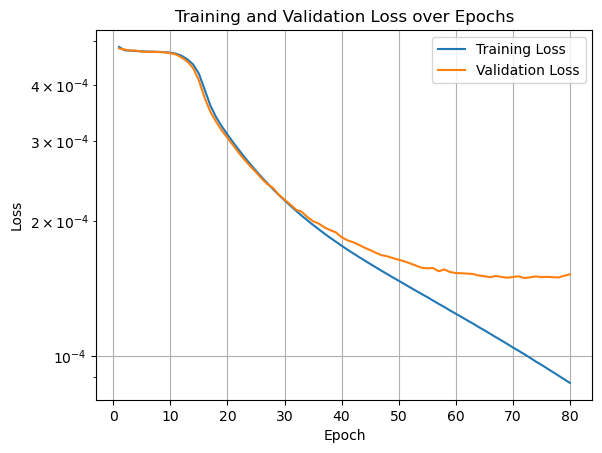

In [35]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch, report_freq=256, save_after_batch=False, save_path=save_path)
    
    val_loss = evaluate(model, val_loader, criterion, device)

    # Print progress for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")

    # Save losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Step the scheduler
    scheduler.step(val_loss)

timestamp = datetime.now().strftime('%y%m%d-%H%M%S')
# Plot the losses
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set the y-axis to log scale
plt.savefig(f'loss_plot_L2_{timestamp}.png')  # Save the plot as a PNG file
plt.show()  # Display the plot

In [36]:
# Save the model weights at the end of training
# save_model(model, save_path)
save_path_posttraining = f'{save_path[:-4]}_e{len(train_losses)}.pth'
save_model(model, save_path_posttraining)
print(f"Saved model weights to {save_path_posttraining}")

Saved model weights to ./model_weights_L2_hc128_lr1e-04_wd1e-02_ss15_gamma3e-01_e80.pth


Sample loss: 0.000123


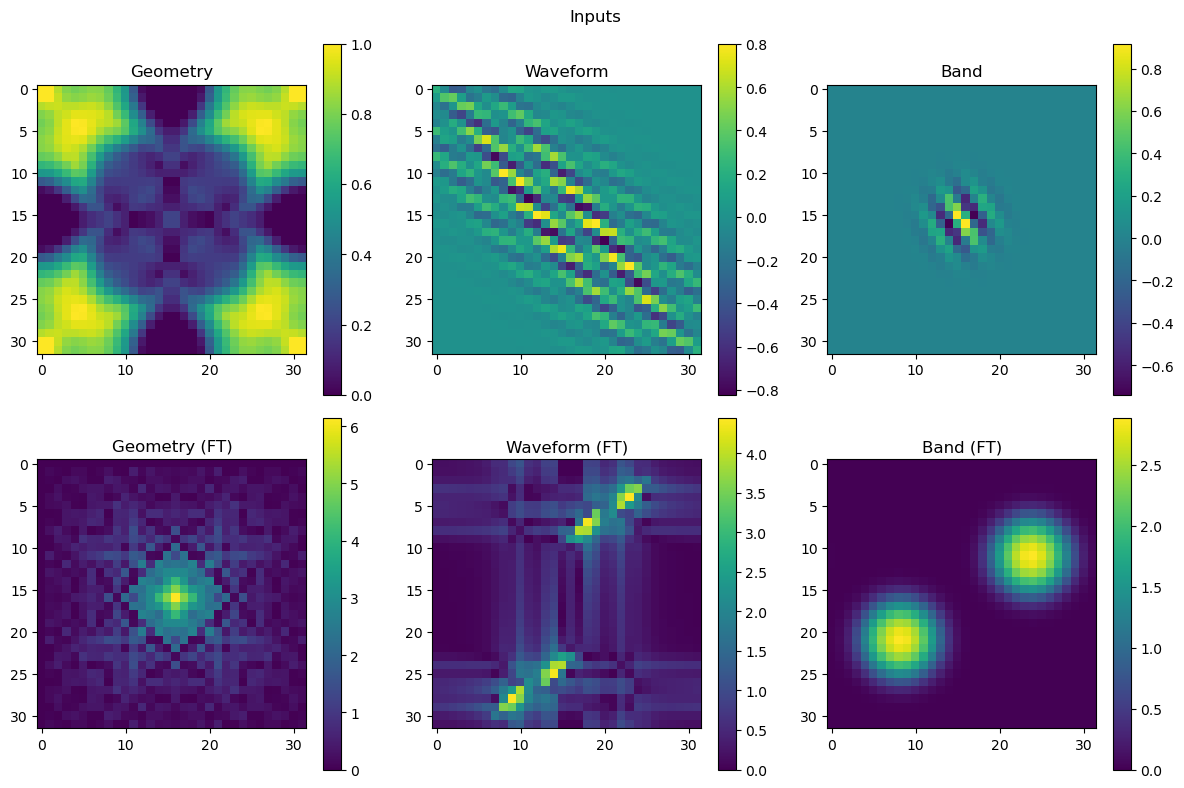

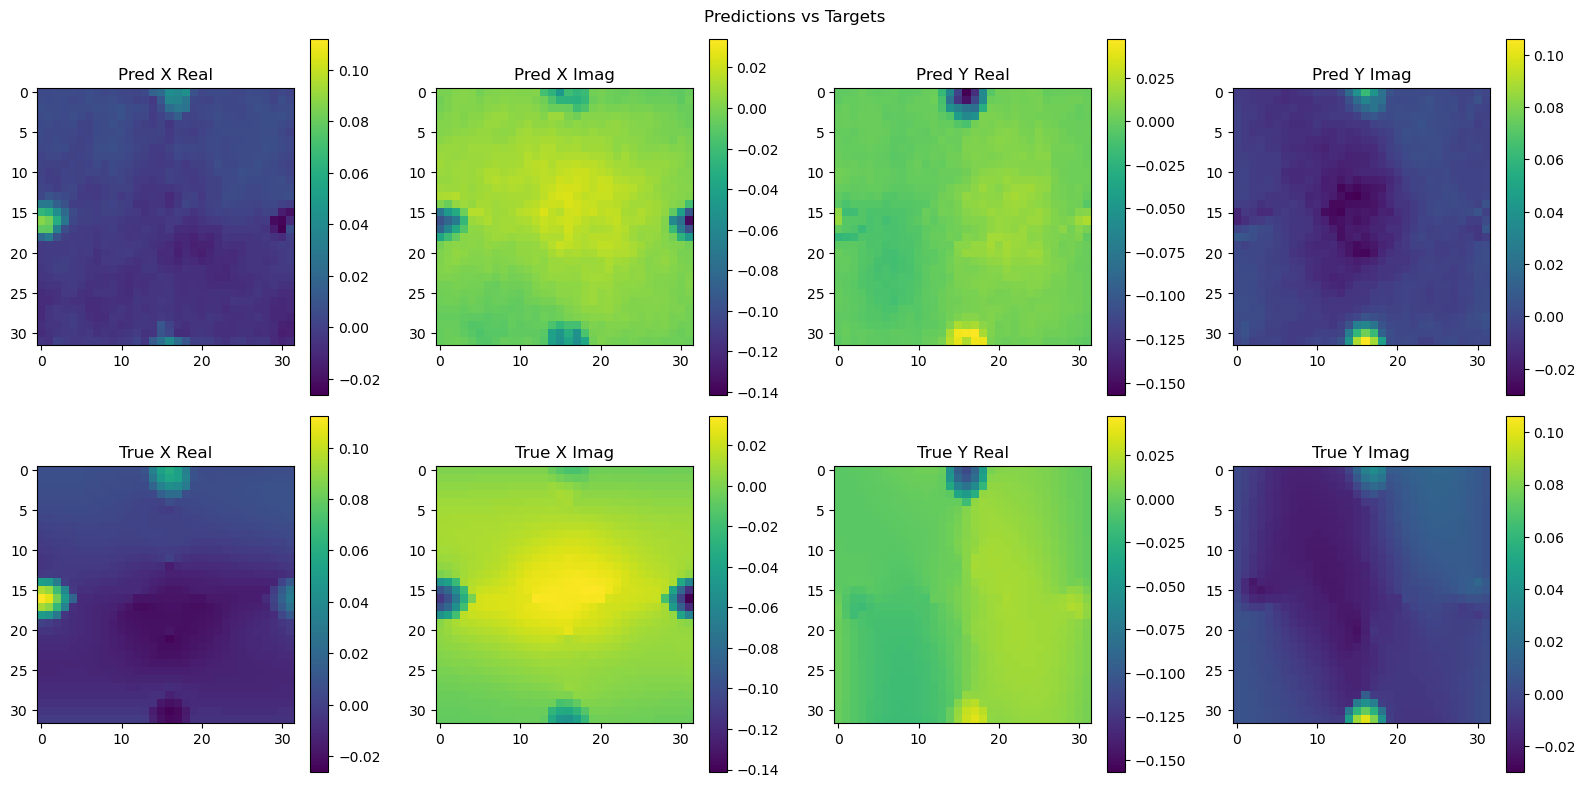

In [50]:
# Get a batch from the validation loader
inputs, targets = next(iter(val_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a random sample from the batch
random_idx = torch.randint(0, len(inputs), (1,)).item()
input_sample = inputs[random_idx]
target_sample = targets[random_idx]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)
    sample_loss = criterion(output_sample.unsqueeze(0), target_sample.unsqueeze(0))
    print(f"Sample loss: {sample_loss.item():.6f}")

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)


Sample loss: 0.000012


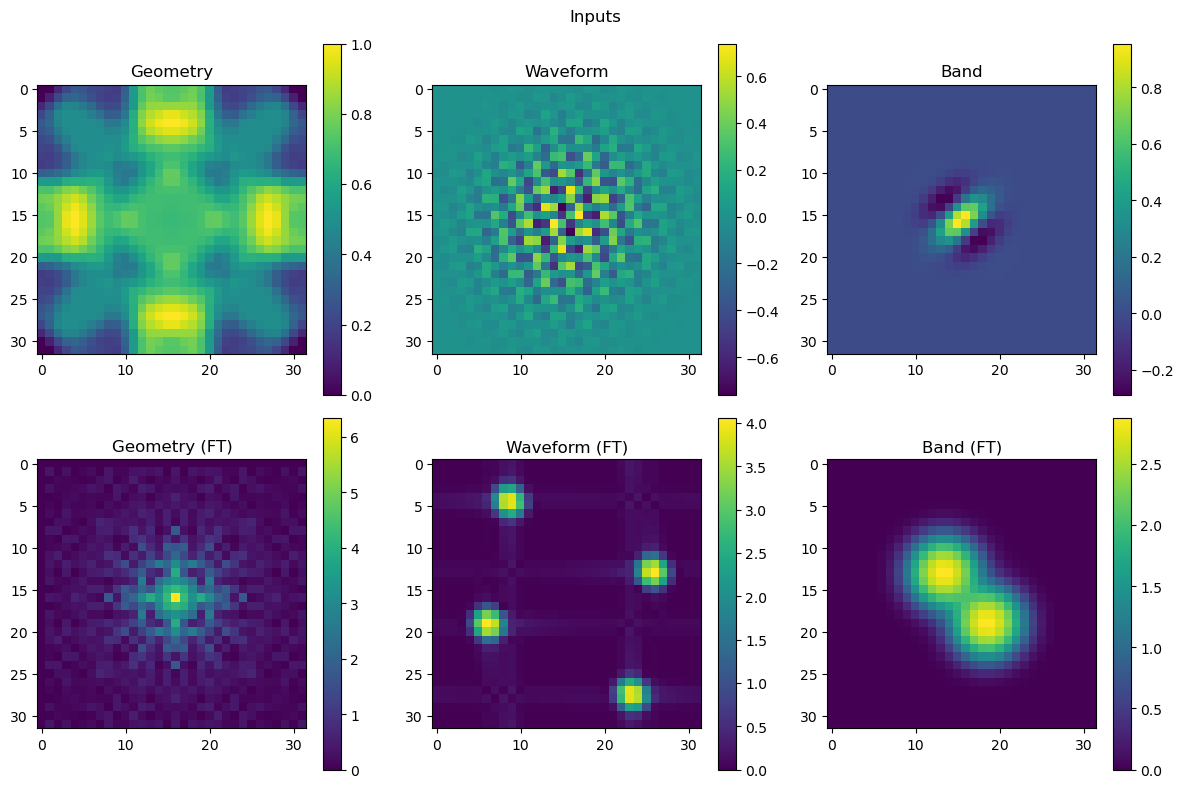

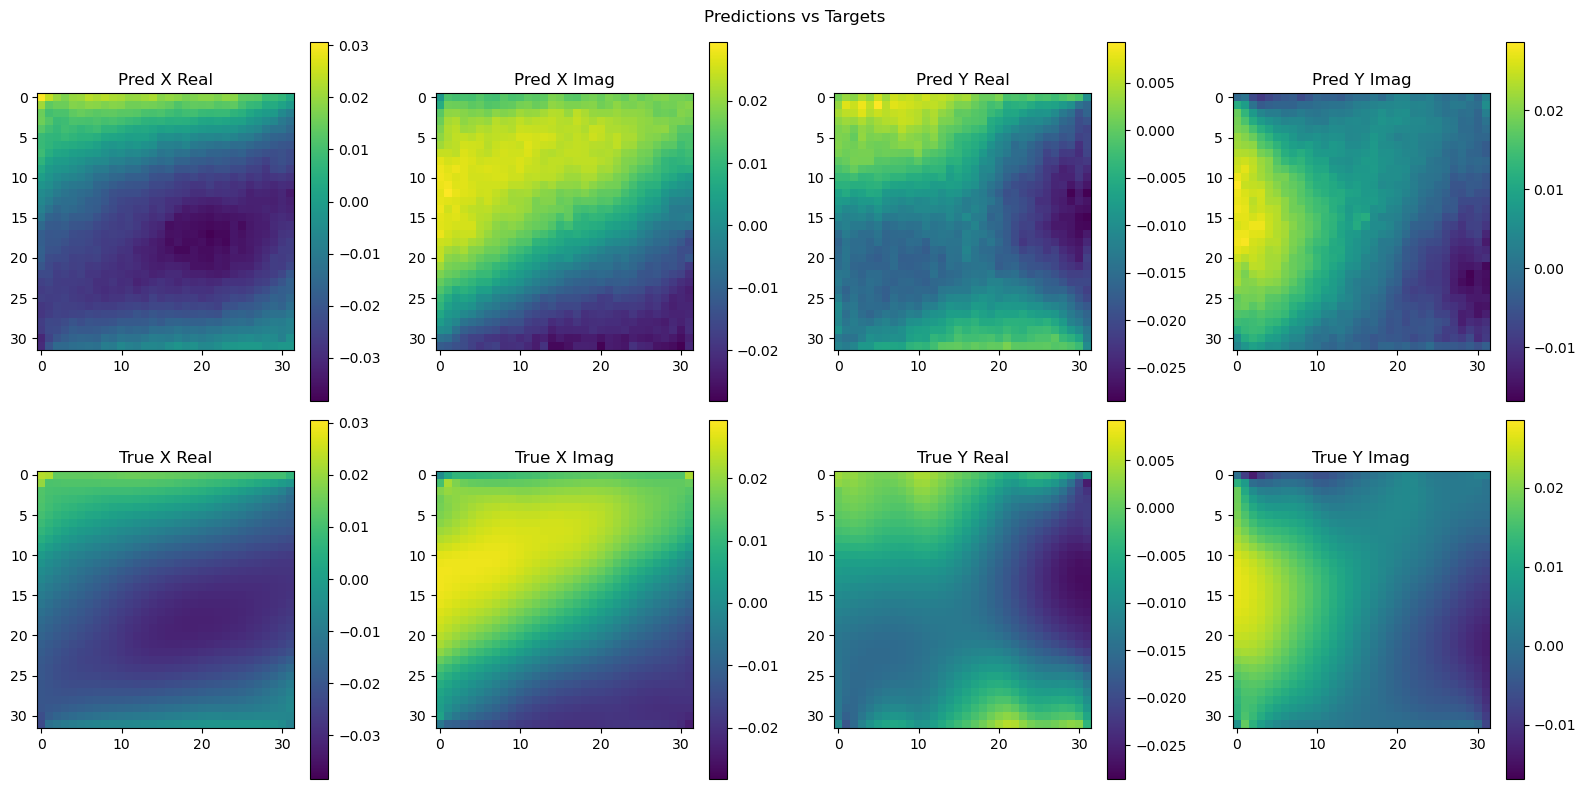

In [51]:
# Get a batch from the validation loader
inputs, targets = next(iter(train_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a random sample from the batch
random_idx = torch.randint(0, len(inputs), (1,)).item()
input_sample = inputs[random_idx]
target_sample = targets[random_idx]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)
    sample_loss = criterion(output_sample.unsqueeze(0), target_sample.unsqueeze(0))
    print(f"Sample loss: {sample_loss.item():.6f}")

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)

In [59]:
def plot_model_weights_histogram(model, log_scale=False, print_analytics=False):
    """
    Plots a histogram of the weight values of a given model.
    
    Parameters:
        model: The model object (e.g., PyTorch or TensorFlow model).
        log_scale (bool): If True, the y-axis of the histogram is set to logarithmic scale.
        print_analytics (bool): If True, prints the mean, standard deviation, and total number of weights.
    """
    # Extract all weight values
    weights = []

    # For PyTorch model
    if hasattr(model, "parameters"):
        for param in model.parameters():
            if param.requires_grad:  # Focus only on trainable parameters
                weights.append(param.data.cpu().numpy().flatten())

    # For TensorFlow/Keras model
    elif hasattr(model, "trainable_weights"):
        for layer_weights in model.trainable_weights:
            weights.append(layer_weights.numpy().flatten())

    else:
        raise ValueError("Unsupported model type. The model must be a PyTorch or TensorFlow model.")

    # Flatten and concatenate all weights into a single array
    all_weights = np.concatenate(weights)

    # Print analytics if the flag is set
    if print_analytics:
        mean = np.mean(all_weights)
        std_dev = np.std(all_weights)
        total_weights = all_weights.size
        print(f"Model Weight Analytics:")
        print(f"  Mean: {mean:.4f}")
        print(f"  Standard Deviation: {std_dev:.4f}")
        print(f"  Total Number of Weights: {total_weights}")

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(all_weights, bins=100, alpha=0.75, color='blue', edgecolor='black')
    plt.title("Histogram of Model Weight Values")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")

    if log_scale:
        plt.yscale('log')  # Set y-axis to logarithmic scale
        plt.ylabel("Frequency (log scale)")

    plt.grid(axis='y', alpha=0.75)
    plt.show()

Model Weight Analytics:
  Mean: 0.0000+0.0000j
  Standard Deviation: 0.0681
  Total Number of Weights: 35852932


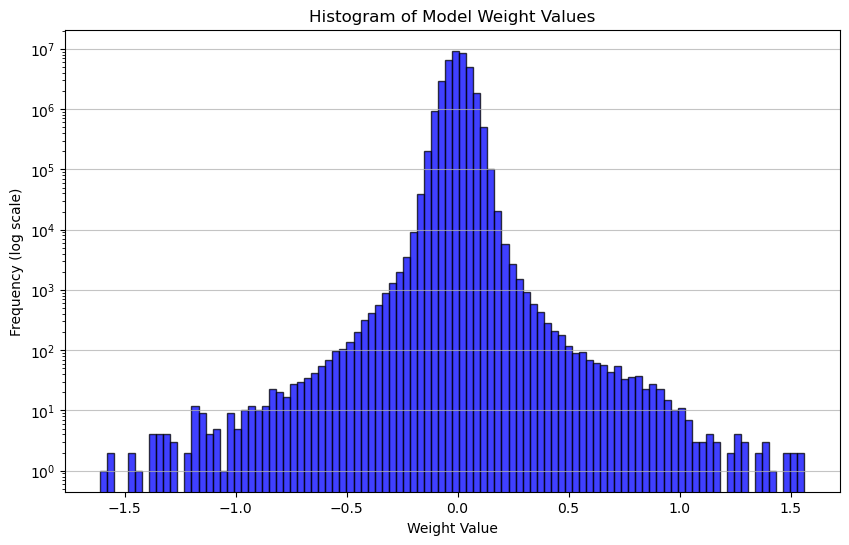

In [60]:
plot_model_weights_histogram(model, log_scale=True, print_analytics=True)

In [35]:
initialized_model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=3, out_channels=4, hidden=hc).to(device)

Model Weight Analytics:
  Mean: 0.0000+0.0000j
  Standard Deviation: 0.0883
  Total Number of Weights: 35852932


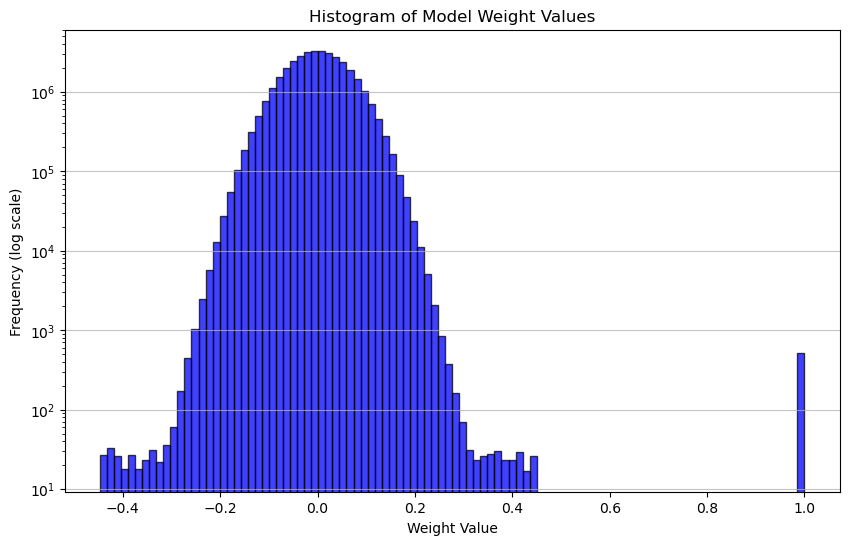

In [ ]:
plot_model_weights_histogram(initialized_model, log_scale=True, print_analytics=True)